In [19]:
setwd("~/Documents/Git-Projects/Git-Research-Projects/drug-response-prediction")
source("helperFunctions.R")
library(repr)

In [20]:
all_model_specs <- data.frame(stringsAsFactors = FALSE)
cnprep_run_1 <- data.frame(dir="prev_run1", model="E", minjoin=0.25, ntrial = 10, stringsAsFactors = FALSE)
cnprep_run_2 <- data.frame(dir="prev_run3", model="V", minjoin=0.25, ntrial = 10, stringsAsFactors = FALSE)
cnprep_run_3 <- data.frame(dir="prev_run_7_19_2018_1", model="E", minjoin=0.50, ntrial = 40, stringsAsFactors = FALSE)
cnprep_run_4 <- data.frame(dir="prev_run_7_19_2018_2", model="E", minjoin=1.00, ntrial = 40, stringsAsFactors = FALSE)
cnprep_run_5 <- data.frame(dir="prev_run_7_19_2018_3", model="V", minjoin=1.00, ntrial = 10, stringsAsFactors = FALSE)
all_model_specs <- rbind(cnprep_run_1, cnprep_run_2, cnprep_run_3, cnprep_run_4, cnprep_run_5)

In [21]:
displayCNResults <- function(organoidId, bin_start, bin_end, model_specs, values, cols, hl){
  par(mfrow=c(nrow(model_specs),1)) 
  par(mar=c(2,2,0,1))
  
  #
  # Calculate plot range
  #
  all_segtables <- lapply(seq(1, nrow(model_specs)), function(model_specs.index){
    return(retrieveSegtable(organoidId, dir = paste0("segClusteringResults/", model_specs[model_specs.index, ]$dir, "/")))
  })
  
  binded_segtables <- do.call(rbind, all_segtables)
  
  ymargin <- 0.1
  yvalues <- sapply(values, function(value){binded_segtables[[value]]})
  xrange <- range(binded_segtables$start,binded_segtables$end)
  yrange <- range(yvalues - ymargin, yvalues + ymargin)
    
  for(model_specs.index in seq(1, nrow(model_specs))){
    segtable <- retrieveSegtable(organoidId, dir = paste0("segClusteringResults/", model_specs[model_specs.index, ]$dir, "/"))
    plot(xrange, yrange, type="n", xlab = "", ylab = "")
    for(value.i in seq_along(values)){
      segments(x0 = segtable$start, x1 = segtable$end, y0 = segtable[[values[[value.i]]]], y1 = segtable[[values[[value.i]]]],
               col = cols[[value.i]], lty = par("lty"), lwd = par("lwd"))
    }
    if(hl == TRUE){
      abline(h=0)
      abline(h=0.5, col = "#4F4F4F")
      abline(h=-0.5, col = "#4F4F4F")
      abline(h=1, col = "#BABABA")
      abline(h=-1, col = "#BABABA")
    }
  }
}


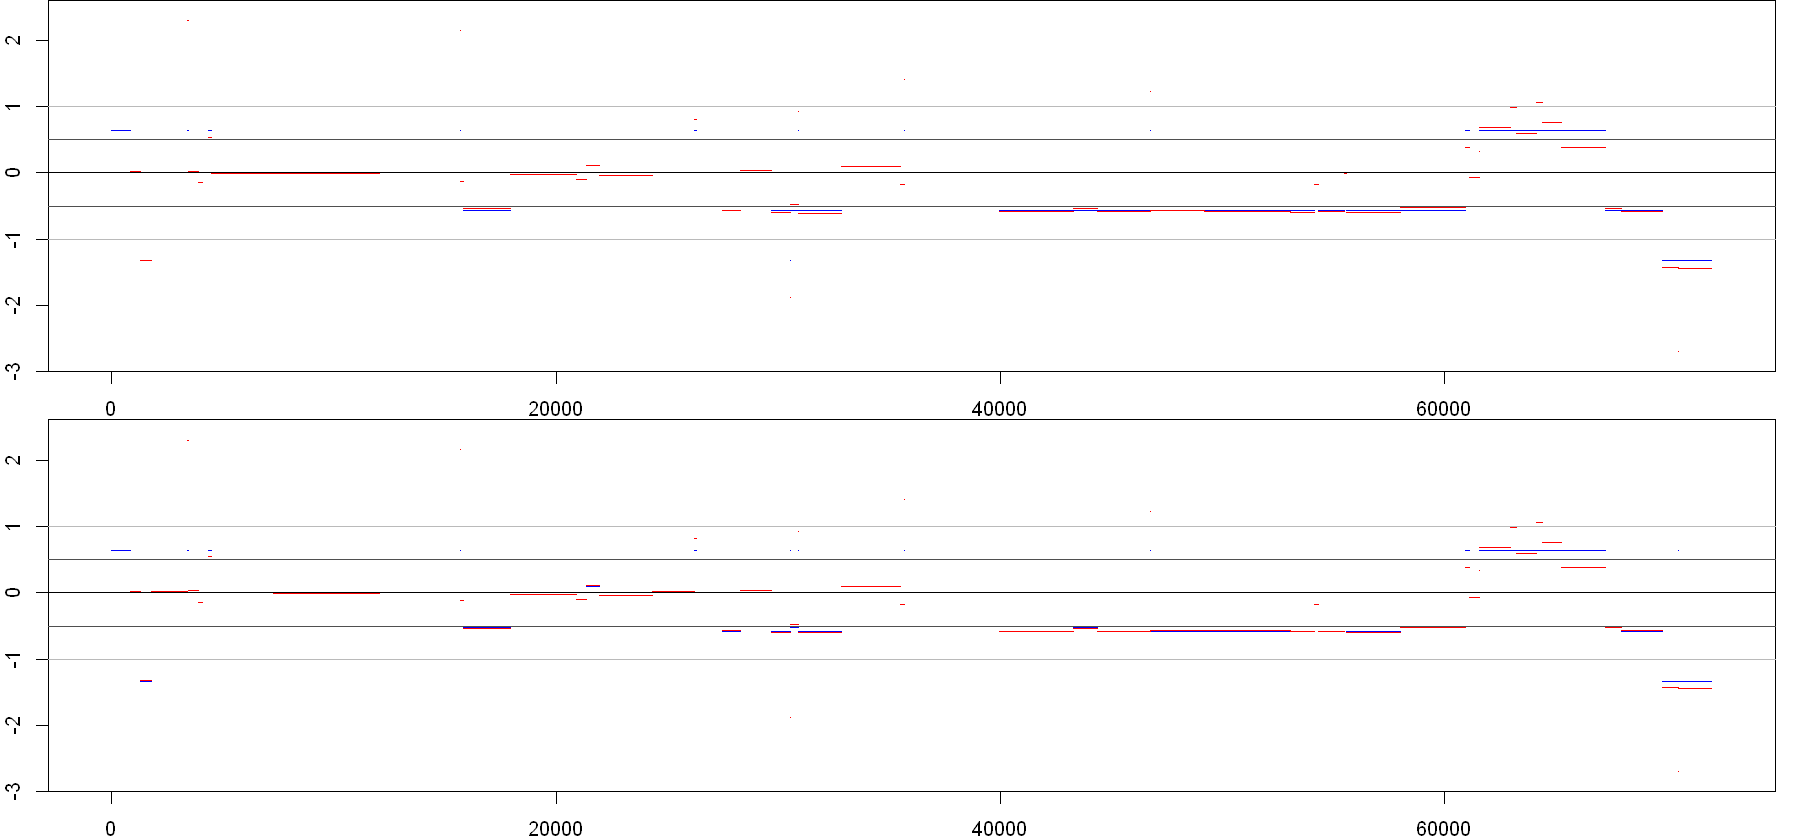

In [25]:
options(repr.plot.width=15, repr.plot.height=7)
displayCNResults(organoidId= "hT30", model_specs = rbind(cnprep_run_4,cnprep_run_2 ), values = c("maxzmean", "mediandev"), cols = c("blue", "red"), hl = TRUE)